In [1]:
%%time

import pandas as pd;
import numpy as np;
from scipy.stats import mode, kstest, normaltest, shapiro, anderson, jarque_bera;
from collections import Counter;
from itertools import product;
from termcolor import colored;
from colorama import Fore, Style, init;
from warnings import filterwarnings;
filterwarnings('ignore');

from tqdm.notebook import tqdm;
from IPython.display import clear_output;

import seaborn as sns;
import matplotlib.pyplot as plt;
from gc import collect;
from pprint import pprint;

pd.set_option('display.max_columns', 50);
pd.set_option('display.max_rows', 50);

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.90,  
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'tab:blue',
         'axes.titlesize'       : 10,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 8.0,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,        
        });

print();
collect();


CPU times: user 1.61 s, sys: 634 ms, total: 2.25 s
Wall time: 1.88 s


In [2]:
%%time   
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    print(style + color + text + Style.RESET_ALL); 


CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 14.5 µs


In [3]:
class CFG:
    version_nb         = 1;
    load_tr_data       = "Y";
    target             = 'LL' if version_nb == 1 else 'PI-LL'
    LL                 = 'trainV1.pickle';
    PI_LL              = 'trainV2.pickle';
    path               = f"./data/";
    ftre_imp           = f'./feat_imp/';
    ftre_plots_req     = "Y";
    title_specs        = {'fontsize': 9, 'fontweight': 'bold', 'color': 'tab:blue'};
    grid_specs         = {'visible': True, 'which': 'both', 'linestyle': '--', 
                           'color': 'lightgrey', 'linewidth': 0.75};

print();
PrintColor(f"--> Configuration done!\n");
collect();


--> Configuration done!



In [4]:
if CFG.load_tr_data == "Y":
    if CFG.version_nb == 1:
        X = pd.read_pickle(CFG.path + CFG.LL)
        PrintColor(f"---> Version with LL target", color = Fore.GREEN)
    else:
        X = pd.read_pickle(CFG.path + CFG.PI_LL)
        PrintColor(f"---> Version with PI-LL target", color = Fore.GREEN)
    strt_ftre = X.columns;
    PrintColor(f"---> Sampled train shapes = {X.shape}", 
               color = Fore.RED);

---> Version with LL target
---> Sampled train shapes = (105, 6)


In [5]:
PrintColor(f"\nTrain information\n");
display(X.info());


Train information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ODI     105 non-null    float64
 1   PT      105 non-null    float64
 2   SS      105 non-null    float64
 3   PI      105 non-null    float64
 4   LL      105 non-null    float64
 5   target  105 non-null    float64
dtypes: float64(6)
memory usage: 5.0 KB


None

In [6]:
PrintColor(f"\nTrain description\n");
display(X.describe(percentiles= [0.05, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99]).\
        transpose().\
        style.format(precision = 2));


Train description



,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
ODI,105.00,58.89,23.02,10.00,26.00,42.00,55.00,80.00,92.00,94.00,99.84,100.00
PT,105.00,22.97,8.49,5.00,9.20,17.00,22.00,28.00,32.00,34.00,49.60,56.00
SS,105.00,31.74,10.37,10.00,17.84,24.00,30.00,39.00,44.00,50.60,57.92,58.00
PI,105.00,54.96,11.04,29.00,40.34,48.00,54.00,60.00,67.00,76.00,89.80,97.00
LL,105.00,37.79,16.04,2.00,10.40,26.00,38.00,49.00,59.00,61.00,70.88,77.00
target,105.00,41.57,11.75,20.00,22.60,32.00,42.00,49.00,57.60,59.62,64.88,75.00



Train data- pair plot




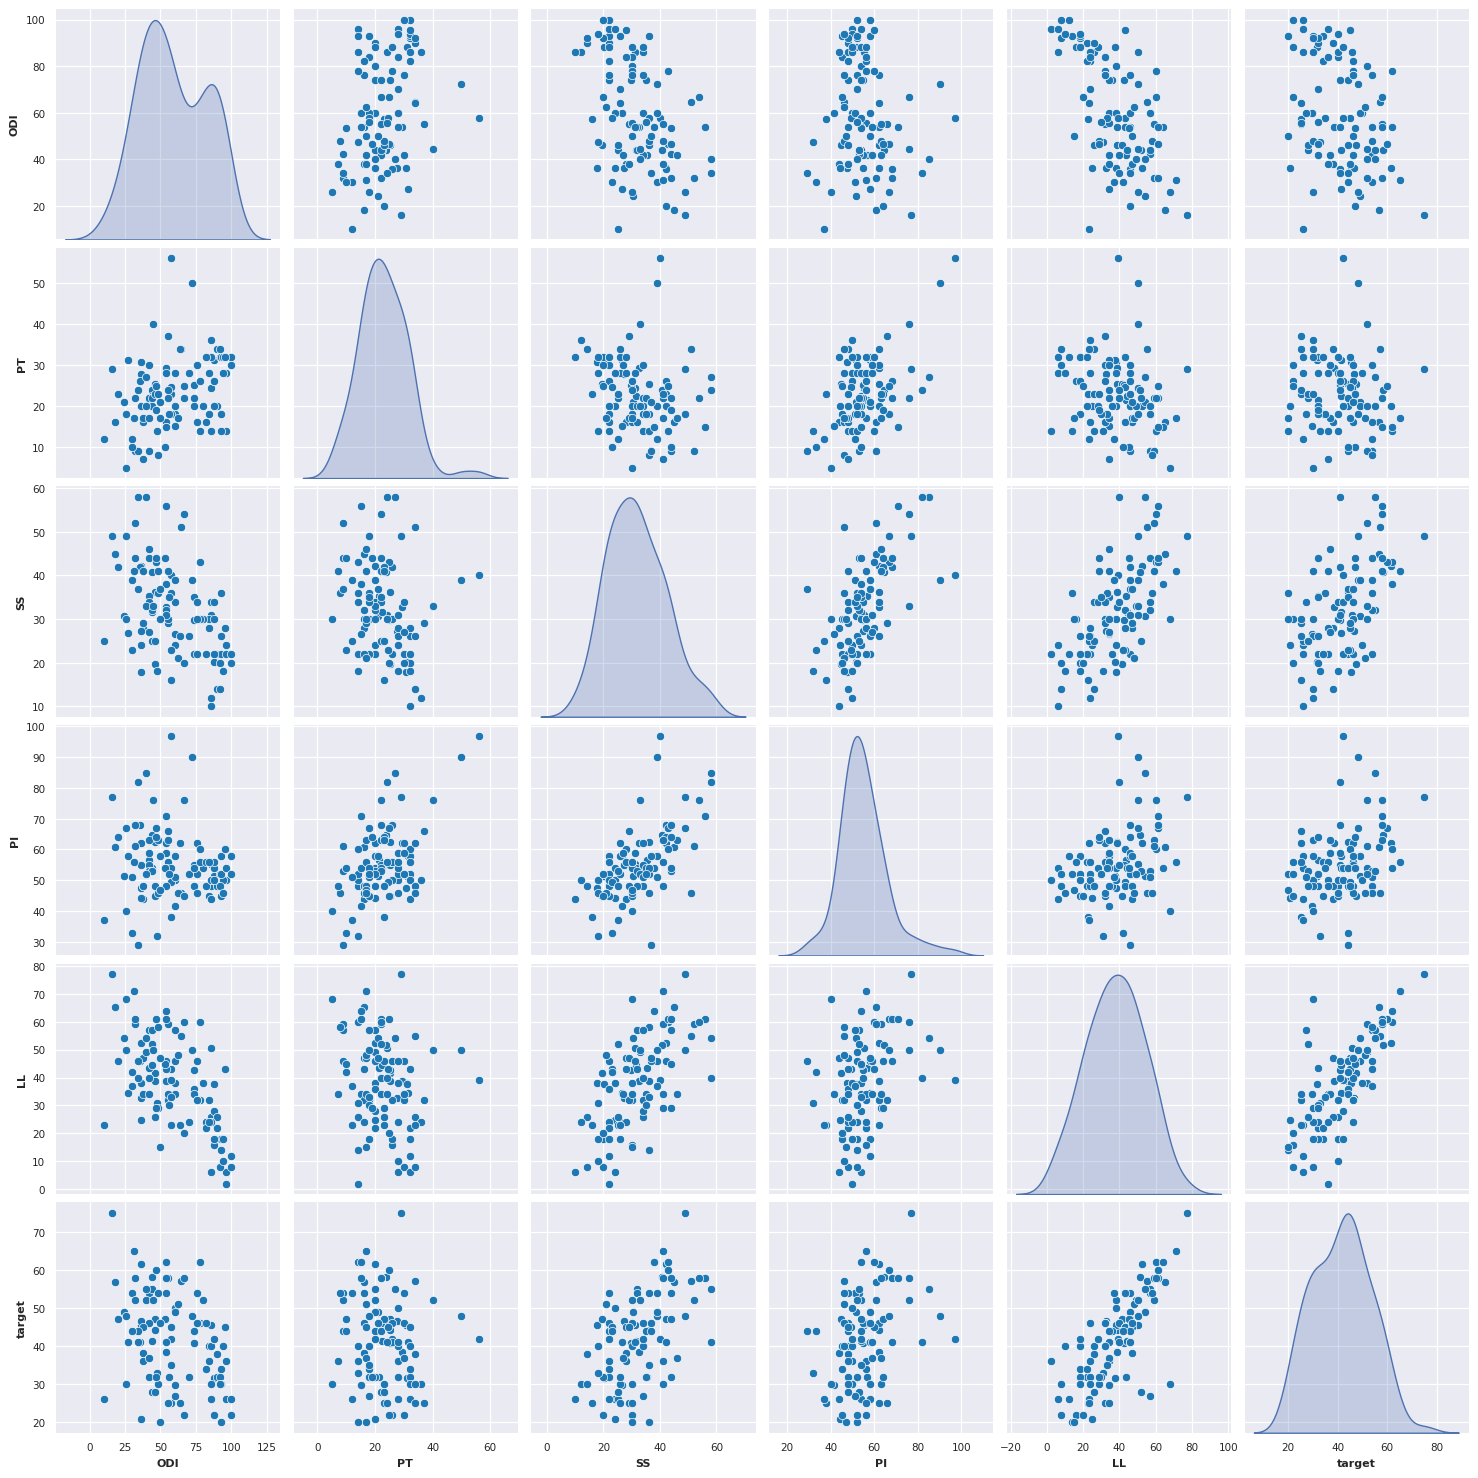

In [7]:
if CFG.ftre_plots_req == "Y":
    PrintColor(f"\nTrain data- pair plot\n");
    _ = sns.pairplot(data = X, 
                     diag_kind = 'kde', markers= 'o', plot_kws= {'color': 'tab:blue'}               
                    );

print();
collect();


 Distribution plots




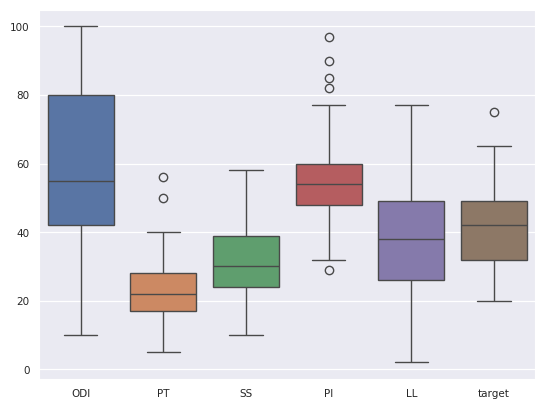

In [8]:
if CFG.ftre_plots_req == "Y":
    PrintColor(f"\n Distribution plots\n");
    _ = sns.boxplot(data = X);

print();
collect();


 Density plots




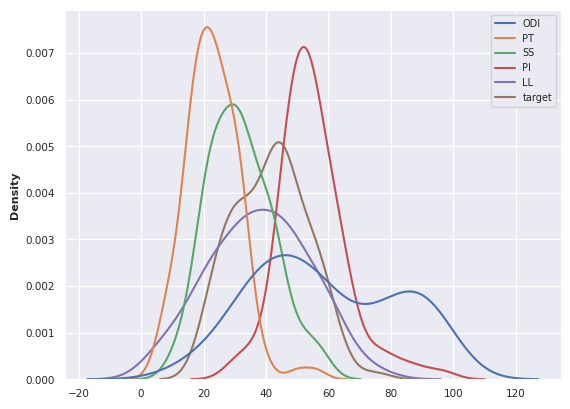

In [9]:
if CFG.ftre_plots_req == "Y":
    PrintColor(f"\n Density plots\n");
    _ = sns.kdeplot(data = X);

print();
collect();


 Corr Matrix




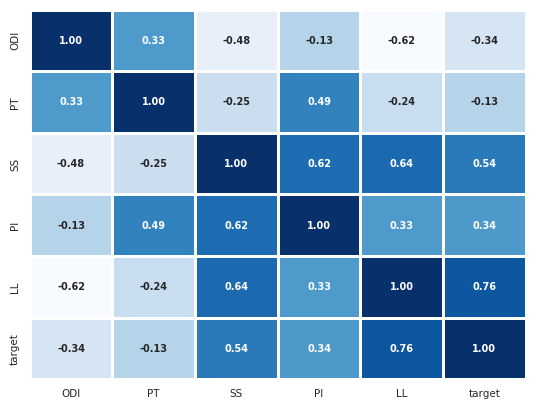

In [10]:
if CFG.ftre_plots_req == "Y":
    PrintColor(f"\n Corr Matrix\n");
    _ = sns.heatmap(data = X.corr(), cmap = "Blues", linewidth = 1.8, linecolor = 'white',
                annot = True, fmt = '.2f', annot_kws = {'fontsize': 7, 'fontweight': 'bold'},
                cbar = None
               );

print();
collect();


 Histogram plots 




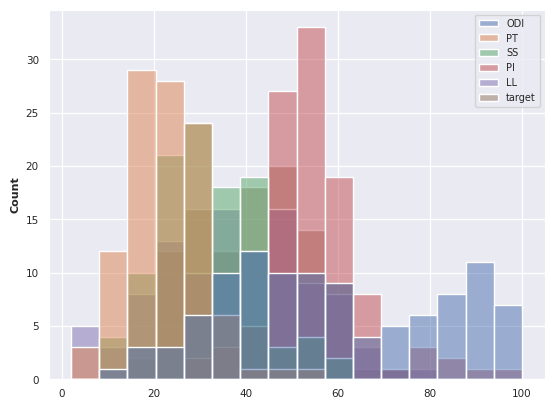

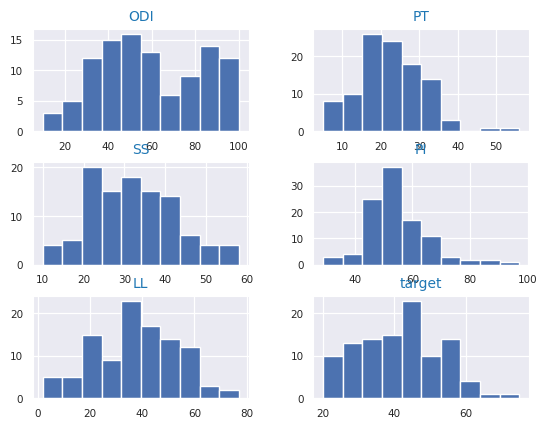

In [11]:
if CFG.ftre_plots_req == "Y":
    PrintColor(f"\n Histogram plots \n");
    _ = sns.histplot(data=X)
    X.hist();
print();
collect();